## Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import re
import sys
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import TweetTokenizer
from wordcloud import WordCloud
from string import punctuation
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [3]:
tweets = pd.read_csv('/kaggle/input/pfizer-vaccine-tweets/vaccination_tweets.csv')

In [4]:
tweets.shape

(5205, 16)

In [5]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5205 entries, 0 to 5204
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                5205 non-null   int64 
 1   user_name         5205 non-null   object
 2   user_location     4120 non-null   object
 3   user_description  4874 non-null   object
 4   user_created      5205 non-null   object
 5   user_followers    5205 non-null   int64 
 6   user_friends      5205 non-null   int64 
 7   user_favourites   5205 non-null   int64 
 8   user_verified     5205 non-null   bool  
 9   date              5205 non-null   object
 10  text              5205 non-null   object
 11  hashtags          3882 non-null   object
 12  source            5204 non-null   object
 13  retweets          5205 non-null   int64 
 14  favorites         5205 non-null   int64 
 15  is_retweet        5205 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 579.6+ KB


In [6]:
# Text Cleaning
stop_nltk= stopwords.words("english")
stop_updated= stop_nltk+["https",'t.co','...']
lemm= WordNetLemmatizer()
tweet_tok=  TweetTokenizer()

def clean_text(text):
    tokens= tweet_tok.tokenize(text.lower())
    tokens1 = [re.sub('^https://t.co/[\w]+','',tok) for tok in tokens]
    tokens2 = [re.sub('^@[\w]+','',tok) for tok in tokens1]
    tokens3 = [re.sub('^#[\w]+','',tok) for tok in tokens2]
    tokens4 = [re.sub('[0-9]+','',tok) for tok in tokens3]
    lemmed=[lemm.lemmatize(term) for term in tokens4 if term not in  stop_updated and term not in list(punctuation) and len(term)>2]
    res=' '.join(lemmed)
    return res

In [7]:
tweets['Clean_Tweets']= tweets['text'].apply(clean_text)

## Top 100 most commonly used words in Tweets

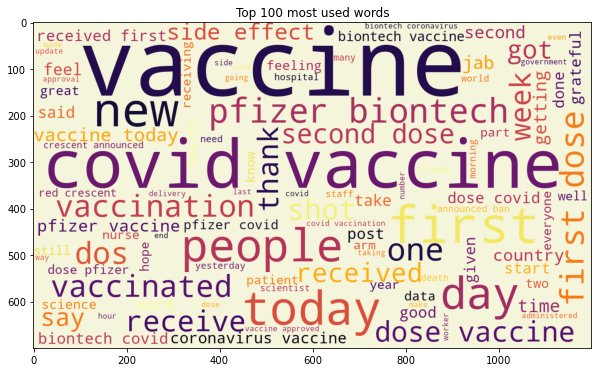

In [8]:
clean_tweets= "".join(tweets['Clean_Tweets'].values)
word_cloud = WordCloud(width=1200,height=700,
                       background_color='beige',colormap='inferno',
                       max_words=100).generate(clean_tweets)

plt.figure(figsize=[10,15])
plt.title("Top 100 most used words")
plt.imshow(word_cloud)
plt.show()

## Top 20 Hashtags

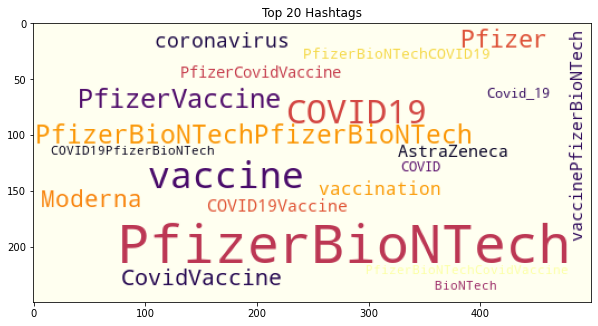

In [9]:
tweets['hashtags'] = tweets['hashtags'].astype('str')
tweets['clean_hashtags'] = tweets['hashtags'].apply(lambda x: x[1:-2])
tokens = [re.sub("'","",token) for token in tweets['clean_hashtags'].values]
clean_hashtag = "".join(tokens)
word_cloud = WordCloud(width=500,height=250,
                       background_color='ivory',colormap='inferno',
                       max_words=20).generate(clean_hashtag)

plt.figure(figsize=[10,15])
plt.imshow(word_cloud)
plt.title("Top 20 Hashtags")
plt.show()

## Number of Verified Users in the Tweet pool

Text(0.5, 1.0, 'Percentage of Verified Users')

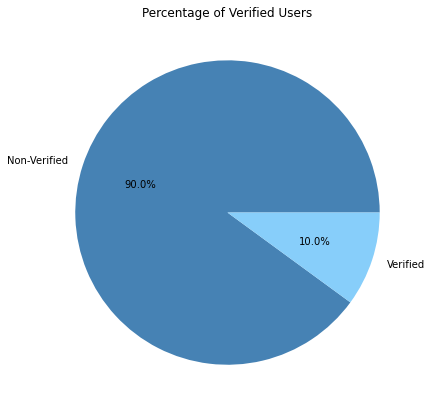

In [10]:
a = pd.DataFrame(tweets['user_verified'].value_counts())
plt.figure(figsize=(7,7))
plt.pie(a['user_verified'],
        labels=['Non-Verified','Verified'],
        autopct='%1.1f%%',
        colors=['steelblue','lightskyblue'])
plt.title("Percentage of Verified Users")